<a href="https://colab.research.google.com/github/jaealways/Study_is_all_you_need/blob/main/Pseduo_Inverse_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

작성자: 이재형 <br>
작성일: 2023-11-10

# 0. 유사역행렬의 필요성

- 역행렬은 정방행렬(행과 열의 갯수가 같은 행렬)에서만 정의되는데, 정방행렬이 아닌 경우 역행렬 계산을 할 수 없다는 단점 존재
- 행과 열의 갯수가 다른 행렬 A에 대해 역행렬 계산이 가능하도록 하는 것이 유사역행렬(무어-펜로즈 행렬)

In [ ]:
import numpy as np

x= np.arange(1,10).reshape(3,3)
y= np.array([[6,23],[-1,7],[8,9]])
A=np.dot(x,y)

In [ ]:
A

array([[ 28,  64],
       [ 67, 181],
       [106, 298]])

In [ ]:
np.linalg.inv(A)

LinAlgError: ignored

- 정방행렬(full rank)이 아니라서 error 발생

# 1. SVD

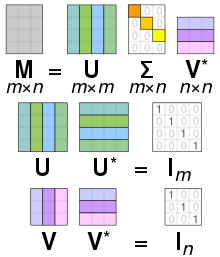
<br>[출처 위키백과](https://en.wikipedia.org/wiki/Singular_value_decomposition)

- Singular Value Decomposition(SVD)를 활용하면 무어-펜로즈 유사 역행렬을 쉽게 계산할 수 있음
- 특이값분해를 통해 어떤 행렬 A를 다음과 같이 나타낼 수 있음
$$A=U \Sigma V^T $$
- 이 때, U와 V는 transpose된 값을 곱해서 단위행렬로 만들 수 있음


<br>[참고자료 공돌이의 수학노트](https://angeloyeo.github.io/2019/08/01/SVD.html)

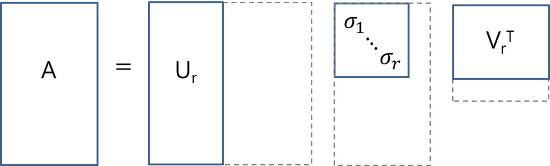

[참고자료 다크프로그래머 특이값분해의 활용](https://darkpgmr.tistory.com/106)

- 결국 SVD를 통해 한 행렬을 여러 특성으로 분해하고, 데이터를 압축하는데 응용할 수 있음

In [ ]:
U,S,V=np.linalg.svd(A)
S=np.diag(S)

In [ ]:
print(U)
print()
print(S)
print()
print(V)

[[-0.18489707  0.89394989  0.40824829]
 [-0.51190304  0.26699926 -0.81649658]
 [-0.83890902 -0.35995136  0.40824829]]

[[377.02031651   0.        ]
 [  0.           5.06763672]]

[[-0.34056249 -0.94022188]
 [ 0.94022188 -0.34056249]]


# 2. 유사역행렬

- 해를 구하기 위해선 미지수의 갯수(m)와 주어진 식의 갯수(n)를 생각해야 함
- 일반적으로 m>n인 경우, 모든 해를 구할 수 없음
- 유사역행렬은 m<n일 경우엔 적어도 한 개의 해를,
- m>n일 경우엔 최적의 해를 추정하는 용도로 사용
- **(이 때 모든 열벡터는 선형독립이 가정되야 함) 즉 아래 케이스는 n이 하나임**
$$2x+4=0 \\ x+2=0$$


## 2.1 m>n

$$ A^+=(A^T A)^{-1} A^T $$
- $A^+$는 $A$의 유사역행렬로 $A^+A=I$가 성립
- m>n 조건을 만들기 위해 A를 transpose 시킴

In [ ]:
A=np.transpose(A)
U,S,V=np.linalg.svd(A)
S=np.diag(S)

- SVD를 활용해서 $A^+$를 다음과 같이 나타낼 수 있음

$$ A^+=V \Sigma^{-1} U^T $$

In [ ]:
np.linalg.pinv(A)

array([[ 0.16602564, -0.05961538],
       [ 0.05      , -0.01666667],
       [-0.06602564,  0.02628205]])

In [ ]:
U

array([[-0.34056249, -0.94022188],
       [-0.94022188,  0.34056249]])

In [ ]:
A_p=V*np.linalg.inv(S)*np.transpose(U)

ValueError: ignored

# Reference
[유사 역행렬 (Pseudo Inverse Matrix)](https://pasus.tistory.com/31)


# Further Reading
- 조금 더 자세하고 디테일한 수학적 증명 <br>
[공돌이의 수학정리노트 의사역행렬의 기하학적 의미](https://angeloyeo.github.io/2020/11/11/pseudo_inverse.html)
